In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'./train.csv')
df.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [3]:
# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Handle missing values (replace NaN with an empty string)
df['text'] = df['text'].fillna('')

# Check missing values after preprocessing
print("\nMissing values after preprocessing:")
print(df.isnull().sum())


Missing values before preprocessing:
text         0
sentiment    0
dtype: int64

Missing values after preprocessing:
text         0
sentiment    0
dtype: int64


In [4]:
# stopwords
total_stopwords= set(stopwords.words('english'))

# subtracy negetive stopwords like no, not, don't, etc... from total_stopwords
negetive_stop_words=set(word for word in total_stopwords
                        if "n't" in word or 'no' in word)

final_stopwords= total_stopwords - negetive_stop_words


#
final_stopwords.add("one")
print(final_stopwords)

{"they'll", 'ci', 'certainly', 'ij', 'thered', 'himself', 'relatively', 'indeed', 'whereas', 'beyond', 'whether', 'unlike', 'goes', 'bn', 'specify', 'aj', 'course', 'ba', 'over', 'xn', 'might', 'going', 'ny', 'ask', 'ec', 'both', 'ar', 'briefly', 'sixty', 'h', 'are', 'anybody', 'everyone', 'fify', 'okay', 'ts', 'nevertheless', 'va', 'under', 'x', 'it', 'down', 'value', 'thoughh', 'js', 'amount', 'saw', 'primarily', 'pd', 'r', 'ge', 'cu', 'rn', 'tends', 'meanwhile', "there've", 'un', 'j', 'do', 'ej', 'but', 'ever', 'rv', "who'll", 'v', "there's", 'om', 'rr', 'lately', 'such', 'will', 'tm', 'a', 'specified', "why's", 'changes', "that's", 'afterwards', 'ev', 'approximately', 'ps', 'he', 'zero', 'something', 'means', 'poorly', 'g', 'ah', 'promptly', "you'll", 'werent', 'take', 'miss', 'ax', 'downwards', 'yourself', 'gave', 'somehow', 'pc', 'fifteen', 'much', 'less', 'whole', 'anyways', 'a1', 'c3', 'ay', 'myself', 'ke', 'inc', 'appreciate', 'ss', 'i6', 'thereto', 'really', 'yj', 'specifying

In [5]:
#stemming object
stemmer = PorterStemmer()

#-----------------------------
HTMLTAGS= re.compile(r'<.*?>')
table= str.maketrans(dict.fromkeys(string.punctuation))
remove_digits= str.maketrans('','',string.digits)
MULTIPLE_WHITESPACE= re.compile(r"\s+")

In [6]:
def preprocessor(review):
    if isinstance(review, str):
        # Remove html tags
        review = HTMLTAGS.sub(r' ', review)
        
        # Remove punctuations
        review = review.translate(table)
        
        # Remove digits
        review = review.translate(remove_digits)
        
        # Lowercase all letters
        review = review.lower()
        
        # Replace multiple whitespaces with a single space
        review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
        
        # Remove stopwords
        review = [word for word in review.split() if word not in final_stopwords]
        
        # Stemming
        review = ' '.join([stemmer.stem(word) for word in review])
    return review


In [7]:
# before preprocessing
print("Before preprocessing :")
df.text.iloc[6]

Before preprocessing :


'This was a great movie with a good cast, all of them hitting on all cylinders. And when Dianne Keaton is at her best, well, it just doesn\'t get any better than that. But Tom Everett Scott, always underrated, was even better. He should be a star. <br /><br />My only complaint is with one aspect of the screenplay. None of the characters ever acknowledged that the dead daughter wasn\'t always a good person. And neither was her mother, played by Keaton. At one point she breaks a promise she made to one character not to reveal that he had been sleeping around. <br /><br />One of the other commentators said the movie had a "political agenda". That is a baffling thing to say. There was no politics at all in this movie.'

In [8]:
# after applying preprocessig function

df.text= df.text.apply(preprocessor)
print("After preprocessing : ")
df.text.iloc[6]

After preprocessing : 


'great movi good cast hit cylind diann keaton doesnt tom everett scott underr star complaint aspect screenplay none charact acknowledg dead daughter good person mother play keaton point break promis charact not reveal sleep comment movi polit agenda baffl thing no polit movi'

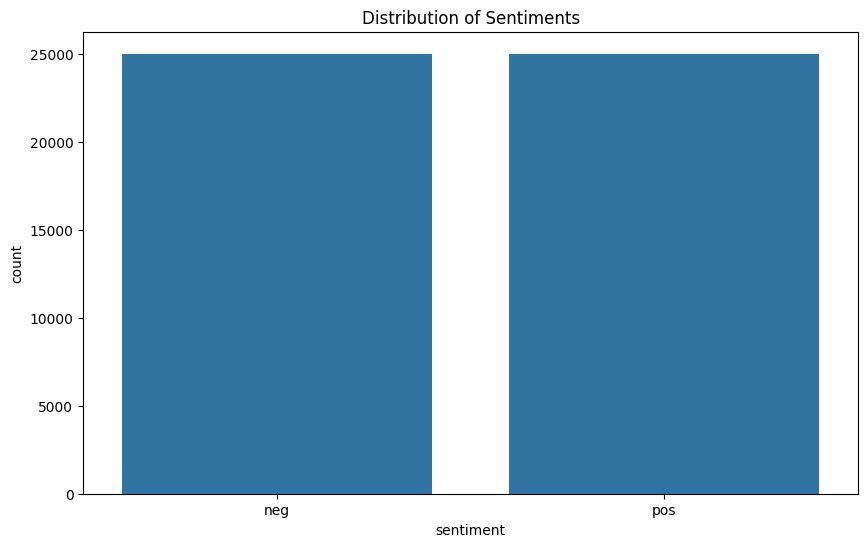

In [9]:
# Additional imports for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


In [10]:

x=df.text
y=df.sentiment

# Use a seed for reproducibility
seed = 42

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=seed, stratify=y)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")



Train shape: (35000,), Test shape: (15000,)


In [11]:
df[['text','sentiment']].sample(5)

,text,sentiment
9026,wonder rehash success movi plot case movi wed ...,neg
14461,catch film marilyn miller not tcm uki intrigu ...,neg
29799,deep breath terribl special effect reach limit...,neg
13230,unknown gem base french farcewhich compliment ...,pos
31764,bit disappoint expect laugh storylin lead acto...,neg


In [12]:
pos=df.loc[df.sentiment=="pos"]
neg=df.loc[df.sentiment=="neg"]

df=pd.concat([pos,neg])
df.shape



(50000, 2)

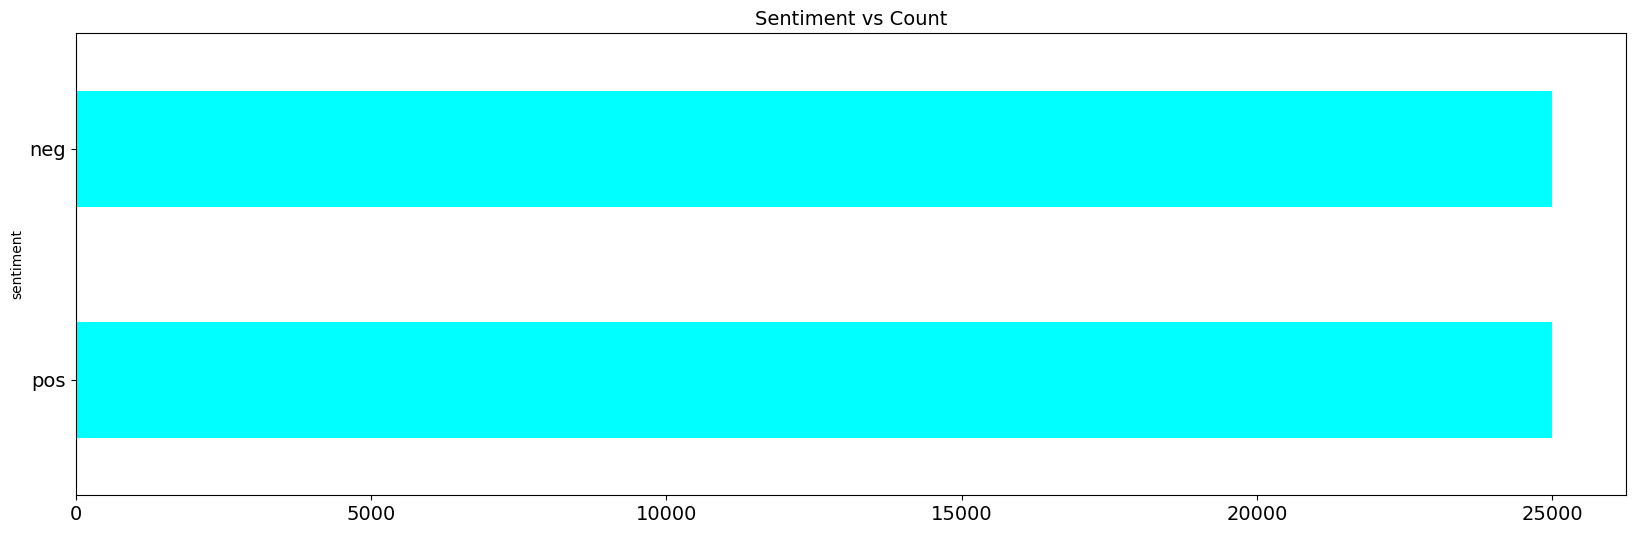

In [13]:

fig, ax=plt.subplots(figsize=(20,6))
vc=df.sentiment.value_counts()
vc.plot.barh(color="cyan",fontsize=14,ax=ax)
ax.set_title("Sentiment vs Count",fontsize=14)
plt.show()


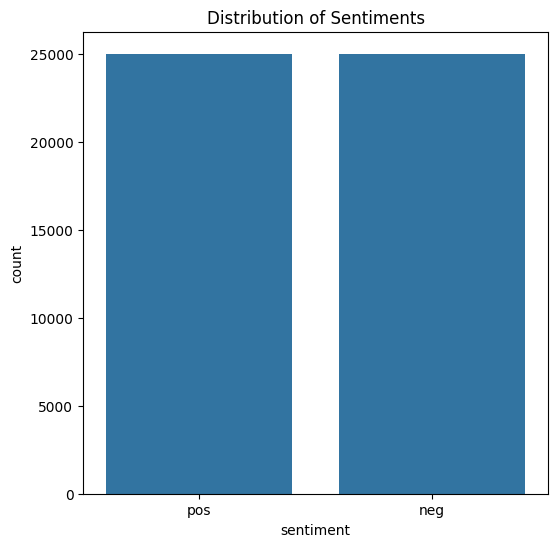

In [14]:
# Additional imports for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


In [15]:
#Tf-IDF vectorizer
tfidf_Vectorizer= TfidfVectorizer(max_features=10000)
tfidf_Vectorizer.fit(x_train)

#transform
tfidf_x_train=tfidf_Vectorizer.transform(x_train)
tfidf_x_test=tfidf_Vectorizer.transform(x_test)


In [16]:
#label encoding the data 
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()

y_train= labelEncoder.fit_transform(y_train)
y_test=labelEncoder.transform(y_test)

labels= labelEncoder.classes_.tolist()
print(labels)

['neg', 'pos']


In [17]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Modify train_and_eval function to include cross-validation
def train_and_eval(model, trainX, trainY, testX, testY, cv=5):
    _ = model.fit(trainX, trainY)
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    print(f"\n{model}")
    print(f"Train Accuracy: {accuracy_score(trainY, y_preds_train)}")
    print(f"Test Accuracy: {accuracy_score(testY, y_preds_test)}")
    print(f"Precision: {precision_score(testY, y_preds_test, average='weighted')}")
    print(f"Recall: {recall_score(testY, y_preds_test, average='weighted')}")
    print(f"F1 Score: {f1_score(testY, y_preds_test, average='weighted')}")
    print(f"Cross-Validation Accuracy: {np.mean(cross_val_score(model, trainX, trainY, cv=cv))}")
    print(40 * '-')


In [18]:
alphas=[0,0.2,0.6,0.8,1,1.2]

for a in alphas:
    #define model
    nb_model= MultinomialNB(alpha=a)

    #train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_x_train,
                   trainY=y_train,
                   testX=tfidf_x_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train Accuracy: 0.8721714285714286
Test Accuracy: 0.8506
Precision: 0.8506216980289928
Recall: 0.8506
F1 Score: 0.8505976885802398
Cross-Validation Accuracy: 0.8459142857142856
----------------------------------------

MultinomialNB(alpha=0.2)
Train Accuracy: 0.8721714285714286
Test Accuracy: 0.8522
Precision: 0.852208571973956
Recall: 0.8522
F1 Score: 0.8521991007136395
Cross-Validation Accuracy: 0.8476285714285714
----------------------------------------

MultinomialNB(alpha=0.6)
Train Accuracy: 0.8725714285714286
Test Accuracy: 0.8526
Precision: 0.8526060240780292
Recall: 0.8526
F1 Score: 0.8525993704355334
Cross-Validation Accuracy: 0.8491428571428573
----------------------------------------

MultinomialNB(alpha=0.8)
Train Accuracy: 0.8719714285714286
Test Accuracy: 0.8531333333333333
Precision: 0.8531366543873807
Recall: 0.8531333333333333
F1 Score: 0.8531329880326698
Cross-Validation Accuracy: 0.8499714285714285
----------------------------------------

Mu

In [19]:
# model evaluation
def plot_cm(y_true,y_pred):
    plt.figure(figsize=(6,6))

    cm= confusion_matrix(y_true,y_pred,normalize='true')

    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [20]:
# predictions for naive classifier model
y_preds_train= nb_model.predict(tfidf_x_train)
y_preds_test= nb_model.predict(tfidf_x_test)

# accuracy
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.8714571428571428
Test accuracy score : 0.8538666666666667


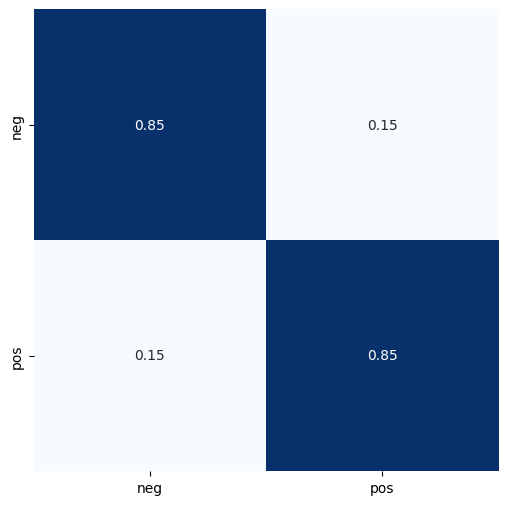

In [21]:
plot_cm(y_test,y_preds_test)

In [23]:
import pickle

# save model and transformer

with open("transformer.pkl",'wb') as f:
    pickle.dump(tfidf_Vectorizer,f)

with open("model.pkl",'wb') as f:
    pickle.dump(nb_model ,f)


In [24]:
def get_sentiment(review):
    
    #preprocessing
    x= preprocessor(review)

    #vectorization
    x= tfidf_Vectorizer.transform([x])

    #prediction
    y= int(nb_model.predict(x.reshape(1,-1)))
    return labels[y]

# negetive review

arr=["this is a very very bad movie","movie was very bad","movie was bad","this was a movie ?",
     "movie was very good","movie was good","movie was worst",
     "the movie was terrible","it was amazing","the movie was moderate","the movie was the most badass movie",
     "it was the most awesome movie",
     "it was neutral","basic movie","it was up to the mark","my name is khan","the movie was okay",
     "the movie was not worthit at all","that movie had a sad ending","the movie was not worthit at all",
     "that movie had a sad ending",
     "The dilemma of the storyline was fascinating","i wasen't satisfied with the movie"]

for i in arr:
    print(f"{i} : This is a {get_sentiment(i)} review !")

this is a very very bad movie : This is a neg review !
movie was very bad : This is a neg review !
movie was bad : This is a neg review !
this was a movie ? : This is a neg review !
movie was very good : This is a neg review !
movie was good : This is a neg review !
movie was worst : This is a neg review !
the movie was terrible : This is a neg review !
it was amazing : This is a pos review !
the movie was moderate : This is a neg review !
the movie was the most badass movie : This is a neg review !
it was the most awesome movie : This is a pos review !
it was neutral : This is a pos review !
basic movie : This is a neg review !
it was up to the mark : This is a pos review !
my name is khan : This is a pos review !
the movie was okay : This is a neg review !
the movie was not worthit at all : This is a neg review !
that movie had a sad ending : This is a pos review !
the movie was not worthit at all : This is a neg review !
that movie had a sad ending : This is a pos review !
The dilem